In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# 忽略所有警告
warnings.filterwarnings("ignore")

# 设置中文字体为 SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

df = pd.read_excel("../已整合数据/马鞍山2号2024.xlsx")
df=df.drop(columns=['排汽温度'])

In [3]:
# 查看数据的基本信息
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   日期        366 non-null    datetime64[ns]
 1   季度        366 non-null    int64         
 2   季度中的月份    366 non-null    int64         
 3   月份        366 non-null    int64         
 4   星期        366 non-null    int64         
 5   平均负荷      366 non-null    float64       
 6   主汽温度      366 non-null    float64       
 7   主汽压力      366 non-null    float64       
 8   氧量        366 non-null    float64       
 9   排烟温度      366 non-null    float64       
 10  送风温度      366 non-null    float64       
 11  再热汽温      366 non-null    float64       
 12  给水温度      366 non-null    float64       
 13  全水        366 non-null    float64       
 14  收到基灰分     366 non-null    float64       
 15  收到基挥发分    366 non-null    float64       
 16  空干基固定碳    366 non-null    float64       
 17  收到基低位发热量  366 no

In [3]:
# 查看是否存在缺失值
print(df.isnull().sum())

平均负荷         0
厂用电率         0
主汽压力         0
主汽温度         0
再热汽温         0
给水温度         0
排汽温度         0
排烟温度         0
进风温度         0
烟气含氧量        0
负荷率          0
全水分%         0
灰份%          0
挥发份%Vad      0
低位热量         0
固定碳%         0
负荷率平均值(%)    0
碳排放强度        0
dtype: int64


# 缺失值处理

In [5]:
# 对 DataFrame 中的所有列使用插值法填充缺失值
# df_all = df.interpolate(method='linear', axis=0)
# df_all = df[(df["碳排放强度"] != 0) & (df["碳排放强度"].notnull()) ]
# 检查填充后的缺失数据
print(df.isnull().sum())


日期          0
季度          0
季度中的月份      0
月份          0
星期          0
平均负荷        0
主汽温度        0
主汽压力        0
氧量          0
排烟温度        0
送风温度        0
再热汽温        0
给水温度        0
全水          0
收到基灰分       0
收到基挥发分      0
空干基固定碳      0
收到基低位发热量    0
排汽温度        0
厂用电率        0
负荷率         0
dtype: int64


In [6]:
df

,平均负荷,厂用电率,主汽压力,主汽温度,再热汽温,给水温度,排汽温度,排烟温度,进风温度,烟气含氧量,负荷率,全水分%,灰份%,挥发份%Vad,低位热量,固定碳%,负荷率平均值(%),碳排放强度
0,387.871964,4.754294,18.065968,564.991994,557.217906,240.940206,25.250681,100.274316,6.628915,3.589511,58.768479,14.2,25.43,26.67,18.19,37.97,59.484201,699.284492
3,438.651730,4.329386,18.681894,550.233005,541.707116,245.981221,28.635072,105.708009,7.282557,3.799235,66.462383,12.9,24.30,28.21,19.40,39.20,66.016146,440.045276
4,424.387947,4.275115,17.676585,566.781002,566.812171,248.763221,27.503570,105.620961,10.873889,3.257425,64.301204,13.4,22.57,28.83,19.62,39.78,65.505694,323.818712
5,426.009484,4.179699,18.965685,567.108393,570.323600,249.202013,28.127692,103.018041,9.555091,3.303967,64.546892,13.0,25.71,28.54,19.11,37.67,65.972465,334.666333
6,467.986842,4.278709,20.128827,567.320133,567.967972,254.069339,29.004102,110.793932,7.341887,2.835114,70.907097,12.4,30.05,26.26,18.03,35.73,71.703785,351.521246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,536.785727,3.514480,23.833649,568.796295,565.480041,265.273621,30.391722,114.439377,7.455163,2.374643,81.331171,16.6,23.49,28.90,18.93,36.91,77.844410,800.699176
362,388.962175,3.514480,18.112924,560.746643,547.274780,246.852801,26.792375,102.516357,6.076645,3.433005,58.933663,20.0,19.40,30.64,18.29,35.78,57.175069,910.331622
363,435.360017,3.514480,18.704281,561.251831,556.695557,252.086365,28.329635,97.923981,5.057175,2.834644,65.963639,20.9,18.91,30.88,18.18,35.75,54.612257,914.206765
364,363.211545,3.514480,16.992607,558.918640,545.457459,243.366595,27.013812,101.438002,8.766281,3.099880,55.032052,19.5,20.41,29.88,18.26,35.48,53.255417,914.339472


In [2]:
# 删除缺失值
cleaned_df = df.dropna()
cleaned_df

,日期,季度,季度中的月份,月份,星期,平均负荷,主汽温度,主汽压力,氧量,排烟温度,送风温度,再热汽温,给水温度,全水,收到基灰分,收到基挥发分,空干基固定碳,收到基低位发热量,厂用电率,负荷率
0,2024-01-01,1,1,1,2,380.734096,563.923271,18.816110,5.258054,91.829359,5.322803,551.739042,242.930432,14.2,25.43,26.67,37.97,18.19,4.263277,57.686984
1,2024-01-02,1,1,1,3,555.222187,566.178899,22.403901,2.750054,101.068574,5.186335,562.776164,260.886631,14.1,23.79,27.66,38.78,19.10,3.680564,84.124574
2,2024-01-03,1,1,1,4,615.686574,565.853552,24.182157,2.013769,105.738866,4.479054,568.877556,270.814549,14.0,23.08,27.98,39.35,19.39,3.463725,93.285845
3,2024-01-04,1,1,1,5,481.318957,565.682970,21.570097,3.668562,98.933337,6.594895,562.761524,253.812202,12.9,24.30,28.21,39.20,19.40,3.767771,72.927115
4,2024-01-05,1,1,1,6,448.704451,566.934629,20.624093,4.045468,99.459174,10.771312,560.703688,250.744193,13.4,22.57,28.83,39.78,19.62,3.812676,67.985523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,4,3,12,6,400.537109,565.486450,16.027335,3.336397,93.337320,6.463180,553.277547,247.886897,16.6,23.49,28.90,36.91,18.93,3.036817,60.687441
362,2024-12-28,4,3,12,7,458.036283,565.325714,20.177045,3.144982,100.194341,4.324570,560.758179,255.124923,20.0,19.40,30.64,35.78,18.29,3.404094,69.399437
363,2024-12-29,4,3,12,1,477.368164,565.532410,20.702390,2.762212,94.088325,4.207260,562.074280,256.763753,20.9,18.91,30.88,35.75,18.18,3.803685,72.328510
364,2024-12-30,4,3,12,2,333.056634,567.048059,15.458119,3.600649,91.650246,8.786041,549.096680,236.050700,19.5,20.41,29.88,35.48,18.26,3.961613,50.463126


# 异常值处理

In [8]:
cleaned_df

,平均负荷,厂用电率,主汽压力,主汽温度,再热汽温,给水温度,排汽温度,排烟温度,进风温度,烟气含氧量,负荷率,全水分%,灰份%,挥发份%Vad,低位热量,固定碳%,负荷率平均值(%),碳排放强度
0,387.871964,4.754294,18.065968,564.991994,557.217906,240.940206,25.250681,100.274316,6.628915,3.589511,58.768479,14.2,25.43,26.67,18.19,37.97,59.484201,699.284492
3,438.651730,4.329386,18.681894,550.233005,541.707116,245.981221,28.635072,105.708009,7.282557,3.799235,66.462383,12.9,24.30,28.21,19.40,39.20,66.016146,440.045276
4,424.387947,4.275115,17.676585,566.781002,566.812171,248.763221,27.503570,105.620961,10.873889,3.257425,64.301204,13.4,22.57,28.83,19.62,39.78,65.505694,323.818712
5,426.009484,4.179699,18.965685,567.108393,570.323600,249.202013,28.127692,103.018041,9.555091,3.303967,64.546892,13.0,25.71,28.54,19.11,37.67,65.972465,334.666333
6,467.986842,4.278709,20.128827,567.320133,567.967972,254.069339,29.004102,110.793932,7.341887,2.835114,70.907097,12.4,30.05,26.26,18.03,35.73,71.703785,351.521246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,536.785727,3.514480,23.833649,568.796295,565.480041,265.273621,30.391722,114.439377,7.455163,2.374643,81.331171,16.6,23.49,28.90,18.93,36.91,77.844410,800.699176
362,388.962175,3.514480,18.112924,560.746643,547.274780,246.852801,26.792375,102.516357,6.076645,3.433005,58.933663,20.0,19.40,30.64,18.29,35.78,57.175069,910.331622
363,435.360017,3.514480,18.704281,561.251831,556.695557,252.086365,28.329635,97.923981,5.057175,2.834644,65.963639,20.9,18.91,30.88,18.18,35.75,54.612257,914.206765
364,363.211545,3.514480,16.992607,558.918640,545.457459,243.366595,27.013812,101.438002,8.766281,3.099880,55.032052,19.5,20.41,29.88,18.26,35.48,53.255417,914.339472


In [9]:
cleaned_df.columns

Index(['平均负荷', '厂用电率', '主汽压力', '主汽温度', '再热汽温', '给水温度', '排汽温度', '排烟温度', '进风温度',
       '烟气含氧量', '负荷率', '全水分%', '灰份%', '挥发份%Vad', '低位热量', '固定碳%', '负荷率平均值(%)',
       '碳排放强度'],
      dtype='object')

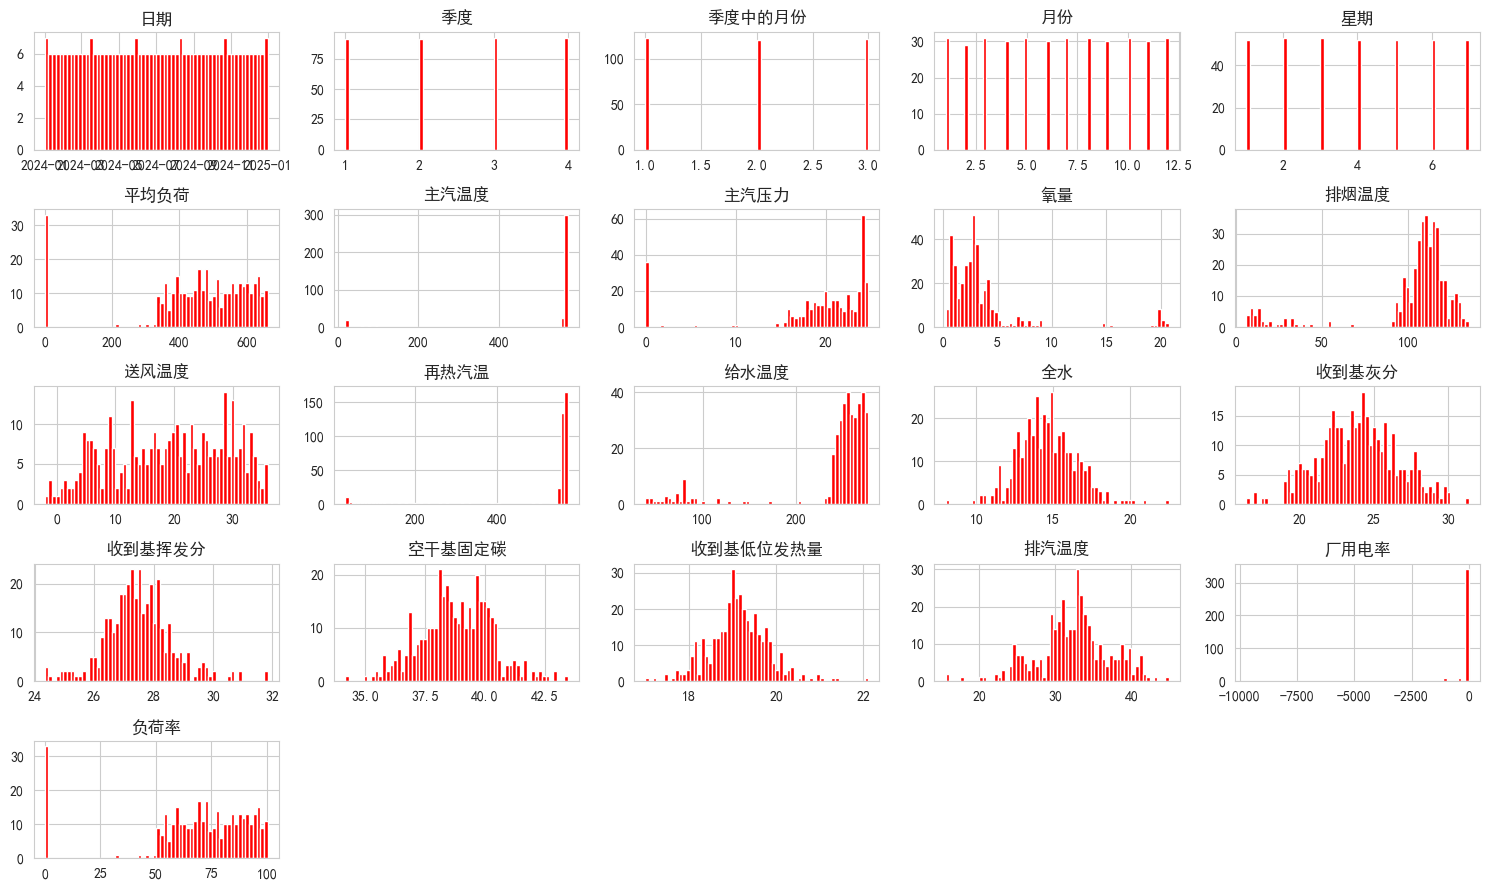

In [7]:
cleaned_df.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

In [3]:
def remove_outlier(df,columns):
    # 1st quartile (25%)
    Q1 = np.percentile(df[columns], 25)
    # 3rd quartile (75%)
    Q3 = np.percentile(df[columns],75)
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    # outlier step
    outlier_step = 1.5 * IQR
    df_out = df[(df[columns]>=Q1-outlier_step) & (df[columns]<=Q3+outlier_step)]
    return df_out

In [4]:
# df_out = remove_outlier(cleaned_df,'平均负荷')
df_out = remove_outlier(cleaned_df,'主汽温度')
# df_out = remove_outlier(df_out,'主汽压力')
df_out = remove_outlier(df_out,'氧量')
df_out = remove_outlier(df_out,'排烟温度')
# df_out = remove_outlier(df_out,'送风温度')
df_out = remove_outlier(df_out,'再热汽温')
df_out = remove_outlier(df_out,'给水温度')
df_out

,日期,季度,季度中的月份,月份,星期,平均负荷,主汽温度,主汽压力,氧量,排烟温度,送风温度,再热汽温,给水温度,全水,收到基灰分,收到基挥发分,空干基固定碳,收到基低位发热量,厂用电率,负荷率
0,2024-01-01,1,1,1,2,380.734096,563.923271,18.816110,5.258054,91.829359,5.322803,551.739042,242.930432,14.2,25.43,26.67,37.97,18.19,4.263277,57.686984
1,2024-01-02,1,1,1,3,555.222187,566.178899,22.403901,2.750054,101.068574,5.186335,562.776164,260.886631,14.1,23.79,27.66,38.78,19.10,3.680564,84.124574
2,2024-01-03,1,1,1,4,615.686574,565.853552,24.182157,2.013769,105.738866,4.479054,568.877556,270.814549,14.0,23.08,27.98,39.35,19.39,3.463725,93.285845
3,2024-01-04,1,1,1,5,481.318957,565.682970,21.570097,3.668562,98.933337,6.594895,562.761524,253.812202,12.9,24.30,28.21,39.20,19.40,3.767771,72.927115
4,2024-01-05,1,1,1,6,448.704451,566.934629,20.624093,4.045468,99.459174,10.771312,560.703688,250.744193,13.4,22.57,28.83,39.78,19.62,3.812676,67.985523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2024-12-26,4,3,12,5,470.023580,565.210938,21.291046,2.903228,98.285842,9.177689,551.980530,255.693083,22.5,19.90,29.62,34.16,17.47,3.261998,71.215694
361,2024-12-27,4,3,12,6,400.537109,565.486450,16.027335,3.336397,93.337320,6.463180,553.277547,247.886897,16.6,23.49,28.90,36.91,18.93,3.036817,60.687441
362,2024-12-28,4,3,12,7,458.036283,565.325714,20.177045,3.144982,100.194341,4.324570,560.758179,255.124923,20.0,19.40,30.64,35.78,18.29,3.404094,69.399437
363,2024-12-29,4,3,12,1,477.368164,565.532410,20.702390,2.762212,94.088325,4.207260,562.074280,256.763753,20.9,18.91,30.88,35.75,18.18,3.803685,72.328510


In [5]:
df_out=df_out[df_out['平均负荷']>0]
df_out=df_out[df_out['主汽压力']>0]
df_out=df_out[df_out['厂用电率']>0]
df_out=df_out[df_out['负荷率']>0]

In [78]:
# df_out[(df_out['运行小时']>-1)|(df_out['运行小时']<25)]

,时间,平均负荷,厂用电率,主汽压力,主汽温度,再热汽温,给水温度,真空度,排汽温度,排烟温度,...,全硫%ad,高位热量,低位热量,固定碳%,#1煤量,#1热值,飞灰%#1,炉渣%#1,负荷,碳排放强度
29,2023-08-30,503.746541,4.048387,21.963646,565.310823,563.783027,256.605620,93.635451,36.490725,121.215395,...,0.42,21.63,18.59,37.71,5116,18.68,1.396667,4.43,507.040972,864.191446
30,2023-08-31,504.245692,4.239242,21.299573,565.778736,562.133942,255.719925,93.793320,36.220205,120.378149,...,0.55,21.76,18.58,38.87,5573,18.60,1.320000,4.25,500.780667,866.830619
31,2023-09-01,450.000000,4.780510,18.289357,565.429870,554.918307,251.164150,94.648271,33.548437,114.759191,...,0.53,20.95,18.15,37.42,4614,17.96,1.226667,5.05,375.874807,877.307192
32,2023-09-02,479.200030,4.316695,20.275322,566.108077,562.200508,254.588100,94.475085,34.044729,119.325913,...,0.48,22.52,19.41,38.61,4478,19.18,1.180000,3.96,433.713368,857.001962
33,2023-09-03,484.600020,4.075412,22.956350,566.907562,570.381374,253.634600,93.990242,35.930107,120.766639,...,1.03,21.52,18.71,37.42,6032,18.81,1.433333,5.56,541.190174,860.820043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2024-12-27,536.785727,3.514480,23.833649,568.796295,565.480041,265.273621,96.556121,30.391722,114.439377,...,0.65,22.48,18.93,36.91,5306,19.24,1.486667,4.91,513.771944,800.699176
515,2024-12-28,388.962175,3.514480,18.112924,560.746643,547.274780,246.852801,97.132126,26.792375,102.516357,...,0.79,21.95,18.29,35.78,3825,18.69,1.476667,5.02,377.354861,910.331622
516,2024-12-29,435.360017,3.514480,18.704281,561.251831,556.695557,252.086365,96.711757,28.329635,97.923981,...,0.86,22.19,18.18,35.75,3668,18.41,1.356667,4.98,360.441215,914.206765
517,2024-12-30,363.211545,3.514480,16.992607,558.918640,545.457459,243.366595,96.686992,27.013812,101.438002,...,0.82,21.59,18.26,35.48,3777,17.91,1.526667,5.29,351.485417,914.339472


In [12]:
cleaned_df.columns

Index(['时间', '平均负荷', '厂用电率', '主汽压力', '主汽温度', '再热汽温', '给水温度', '排汽温度', '排烟温度',
       '进风温度', '烟气含氧量', '负荷率', '全水分%', '灰份%', '挥发份%Vad', '低位热量', '固定碳%', '负荷',
       '碳排放强度'],
      dtype='object')

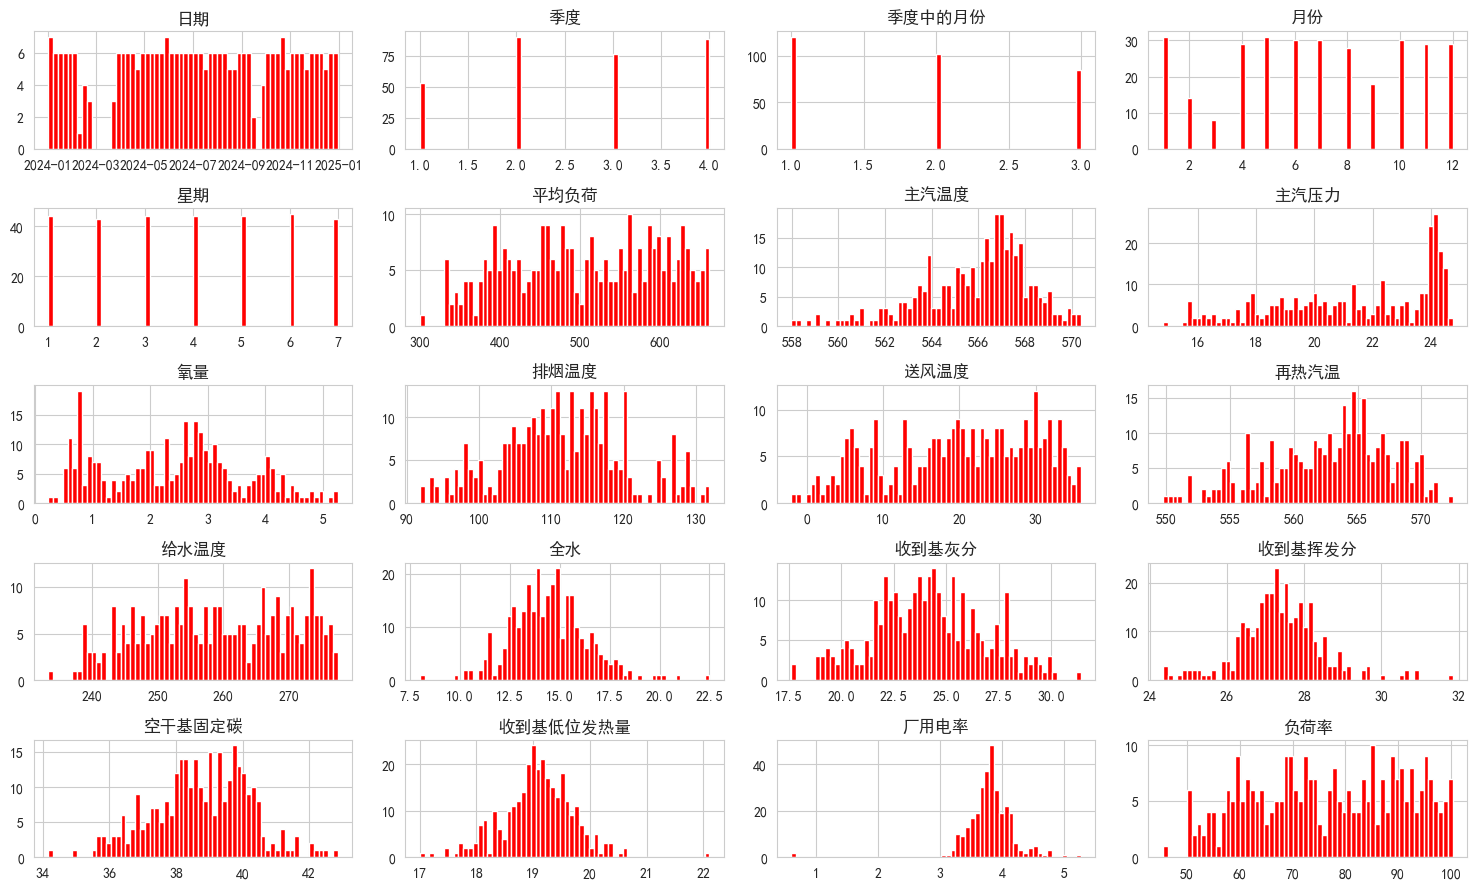

In [6]:
df_out.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

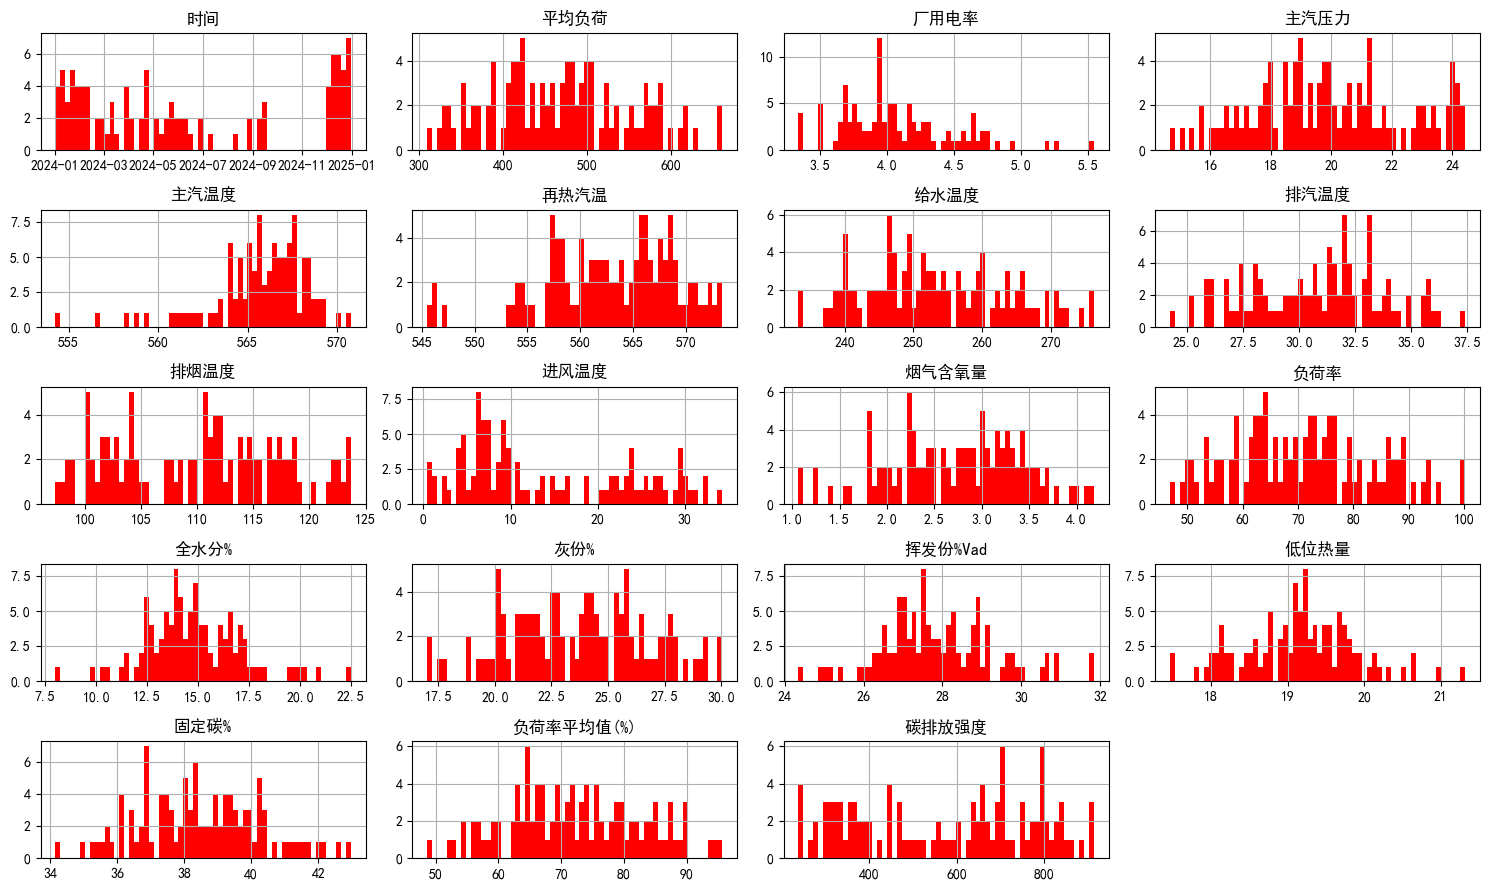

In [21]:
Q1_ZaiReQiWen = np.percentile(cleaned_df["再热汽温"], 25)
Q3_ZaiReQiWen = np.percentile(cleaned_df["再热汽温"],75)
IQR_ZaiReQiWen = Q3_ZaiReQiWen - Q1_ZaiReQiWen
outlier_step_ZaiReQiWen = 1.5 * IQR_ZaiReQiWen

Q1_YangLiang = np.percentile(cleaned_df["烟气含氧量"], 25)
Q3_YangLiang = np.percentile(cleaned_df["烟气含氧量"],75)
IQR_YangLiang = Q3_YangLiang - Q1_YangLiang
outlier_step_YangLiang = 1.5 * IQR_YangLiang

Q1_PaiYanWenDu = np.percentile(cleaned_df["排烟温度"], 25)
Q3_PaiYanWenDu = np.percentile(cleaned_df["排烟温度"],75)
IQR_PaiYanWenDu = Q3_PaiYanWenDu - Q1_PaiYanWenDu
outlier_step_PaiYanWenDu = 1.5 * IQR_PaiYanWenDu

Q1_TanPaiFangQiangDu = np.percentile(cleaned_df["碳排放强度"], 25)
Q3_TanPaiFangQiangDu = np.percentile(cleaned_df["碳排放强度"],75)
IQR_TanPaiFangQiangDu = Q3_TanPaiFangQiangDu - Q1_TanPaiFangQiangDu
outlier_step_TanPaiFangQiangDu = 1.5 * IQR_TanPaiFangQiangDu

'''df_out_1 = cleaned_df[(cleaned_df["再热汽温"]>=Q1_ZaiReQiWen-outlier_step_ZaiReQiWen) & (cleaned_df["再热汽温"]<=Q3_ZaiReQiWen+outlier_step_ZaiReQiWen) &
                (cleaned_df["烟气含氧量"]>=Q1_YangLiang-outlier_step_YangLiang) & (cleaned_df["烟气含氧量"]<=Q3_YangLiang+outlier_step_YangLiang) &
                (cleaned_df["排烟温度"]>=Q1_PaiYanWenDu-outlier_step_PaiYanWenDu) & (cleaned_df["排烟温度"]<=Q3_PaiYanWenDu+outlier_step_PaiYanWenDu) & 
                (cleaned_df["碳排放强度"]>=Q1_TanPaiFangQiangDu-outlier_step_TanPaiFangQiangDu) & (cleaned_df["碳排放强度"]<=Q3_TanPaiFangQiangDu+outlier_step_TanPaiFangQiangDu) &
                (cleaned_df["平均负荷"]>200) & (cleaned_df["厂用电率"]<100) & (cleaned_df["主汽压力"]>10) & (cleaned_df["主汽温度"]>400) &
                (cleaned_df["排汽温度"]<500) & (cleaned_df["碳排放强度"]>200) & (cleaned_df['运行小时']>-1) & (cleaned_df['运行小时']<25) &(cleaned_df['进风温度']>0)  ]'''

df_out_1 = cleaned_df[(cleaned_df["再热汽温"]>=Q1_ZaiReQiWen-outlier_step_ZaiReQiWen) & (cleaned_df["再热汽温"]<=Q3_ZaiReQiWen+outlier_step_ZaiReQiWen) &
                      (cleaned_df["烟气含氧量"]>=Q1_YangLiang-outlier_step_YangLiang) & (cleaned_df["烟气含氧量"]<=Q3_YangLiang+outlier_step_YangLiang) &
                      (cleaned_df["排烟温度"]>=Q1_PaiYanWenDu-outlier_step_PaiYanWenDu) & (cleaned_df["排烟温度"]<=Q3_PaiYanWenDu+outlier_step_PaiYanWenDu) &
                      (cleaned_df["碳排放强度"]>=Q1_TanPaiFangQiangDu-outlier_step_TanPaiFangQiangDu) & (cleaned_df["碳排放强度"]<=Q3_TanPaiFangQiangDu+outlier_step_TanPaiFangQiangDu) &
                      (cleaned_df["平均负荷"]>200) & (cleaned_df["厂用电率"]<100) & (cleaned_df["主汽压力"]>10) & (cleaned_df["主汽温度"]>400) &
                      (cleaned_df["排汽温度"]<500) & (cleaned_df["碳排放强度"]>200) & (cleaned_df['进风温度']>0)  ]

df_out_1.hist(bins=60, figsize=(15,9),color="red")
plt.tight_layout()
plt.show()

In [15]:
df_out_1

,时间,平均负荷,厂用电率,主汽压力,主汽温度,再热汽温,给水温度,排汽温度,排烟温度,进风温度,烟气含氧量,负荷率,全水分%,灰份%,挥发份%Vad,低位热量,固定碳%,负荷,碳排放强度
15,2023-08-16,350.400010,4.584627,20.314977,567.888561,567.639061,248.316642,37.019646,120.140876,31.131037,2.926375,53.090911,15.1,19.83,28.12,20.10,41.28,428.596632,669.129082
16,2023-08-17,478.987448,4.628576,21.905584,567.578365,569.195179,254.743020,37.898847,121.048808,30.241013,2.560485,72.573856,12.7,25.22,27.98,19.39,38.96,479.458021,873.041844
17,2023-08-18,492.464249,4.535567,21.913608,568.181573,569.970216,256.100459,38.064337,122.728656,30.237529,2.397864,74.615795,13.5,24.09,27.66,19.60,39.41,494.591076,822.984904
18,2023-08-19,426.800183,4.343130,20.333754,567.309599,569.220162,248.191102,37.021400,118.411324,31.326756,3.170567,64.666694,13.4,24.41,27.12,19.35,39.59,426.773576,883.578095
19,2023-08-20,402.415839,4.215670,19.274758,567.544396,567.945366,245.135249,36.570291,118.994546,32.299916,3.324670,60.972097,13.2,27.57,26.64,19.10,37.41,406.061215,874.075730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2024-12-27,536.785727,3.514480,23.833649,568.796295,565.480041,265.273621,30.391722,114.439377,7.455163,2.374643,81.331171,16.6,23.49,28.90,18.93,36.91,513.771944,800.699176
515,2024-12-28,388.962175,3.514480,18.112924,560.746643,547.274780,246.852801,26.792375,102.516357,6.076645,3.433005,58.933663,20.0,19.40,30.64,18.29,35.78,377.354861,910.331622
516,2024-12-29,435.360017,3.514480,18.704281,561.251831,556.695557,252.086365,28.329635,97.923981,5.057175,2.834644,65.963639,20.9,18.91,30.88,18.18,35.75,360.441215,914.206765
517,2024-12-30,363.211545,3.514480,16.992607,558.918640,545.457459,243.366595,27.013812,101.438002,8.766281,3.099880,55.032052,19.5,20.41,29.88,18.26,35.48,351.485417,914.339472


In [13]:
df_out.to_excel("../已清洗数据/马鞍山2号清洗2024.xlsx")

In [14]:
df_out.describe().T.to_excel('../已清洗数据/data_mas2.xlsx')

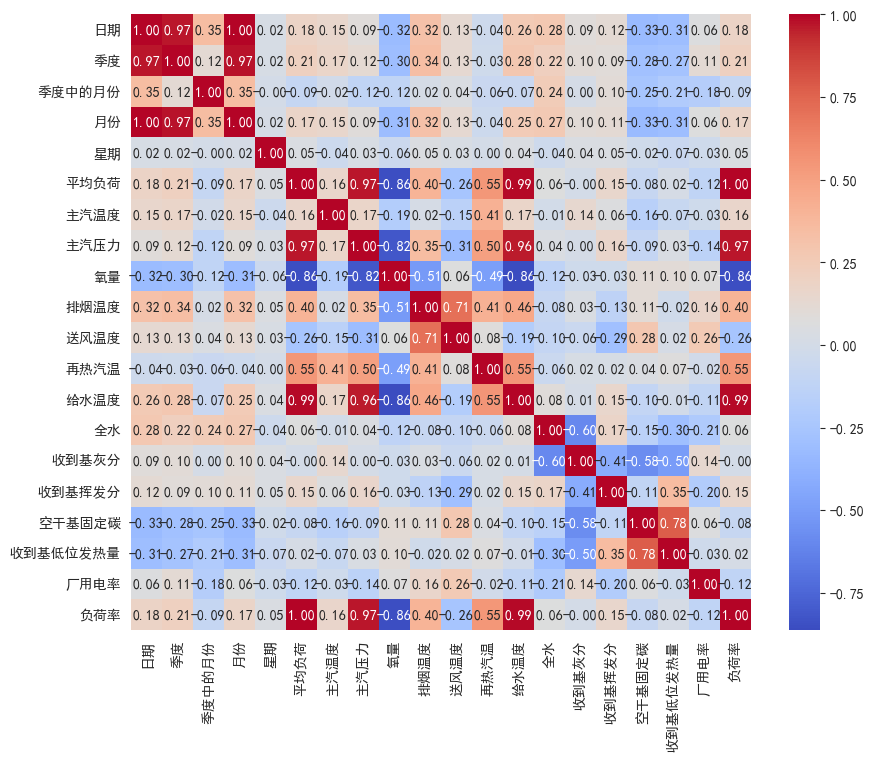

In [7]:
import seaborn as sns
correlation_matrix = df_out.corr()#除日期、机组列
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()